## E-Commerce Fraud Detection Data Visualisation

## Objectives

* Create clear, exam-friendly visualisations that answer the business questions (fraud rate, when/where fraud occurs, by how much, and risk).

* Save PNGs/CSVs to reports/figures/ and reports/tables/ for README (and later Power BI).
* Keep captions/notes short & plain-English

## Inputs

* data/processed/cleaned_transactions.csv

## Outputs

* Figures in reports/figures/…
* Summary tables in reports/tables/…





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [22]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\E-Commerce-Fraud-Detection-Capstone\\E-Commerce-Fraud-Detection-Capstone'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [23]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [24]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\E-Commerce-Fraud-Detection-Capstone'

# Section 1

Set up and load libraries along with dataset.

In [25]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [26]:
# Loading the cleaned transactions dataset

csv_path = Path("DataSet/Cleaned/cleaned_transactions.csv")

# Check if file exists
if not csv_path.exists():
    print(f"❌ File not found: {csv_path.resolve()}")
    print("Available files in DataSet/Cleaned/:")
    cleaned_dir = Path("DataSet/Cleaned")
    if cleaned_dir.exists():
        for file in cleaned_dir.glob("*.csv"):
            print(f"  - {file.name}")
    else:
        print("  Directory doesn't exist")
else:
    # Load the data
    print(f"📂 Loading data from: {csv_path}")
    df = pd.read_csv(csv_path, low_memory=False)
    
    print(f"✅ Data loaded successfully!")
    print(f"📊 Dataset Info:")
    print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    print(f"\n📋 Column Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col} ({df[col].dtype})")
    
    print(f"\n📈 First 5 rows:")
    display(df.head())
    
    print(f"\n📊 Basic Statistics:")
    if 'is_fraud' in df.columns:
        fraud_counts = df['is_fraud'].value_counts()
        total = len(df)
        print(f"   Fraud Distribution:")
        for value, count in fraud_counts.items():
            label = "Fraudulent" if value else "Legitimate"
            pct = (count / total) * 100
            print(f"     {label}: {count:,} ({pct:.1f}%)")
    
    print(f"\n✅ Dataset ready for visualizations!")

❌ File not found: C:\Users\Nine\OneDrive\Documents\VS Code Projects\E-Commerce-Fraud-Detection-Capstone\DataSet\Cleaned\cleaned_transactions.csv
Available files in DataSet/Cleaned/:
  Directory doesn't exist


In [27]:
# Adding the folder to where images will be saved

FIGDIR = Path("reports/figures"); FIGDIR.mkdir(parents=True, exist_ok=True)

---

# Section 2

Section 2 will show our visualisations representing key metrics and also complying with the capstone project objective.

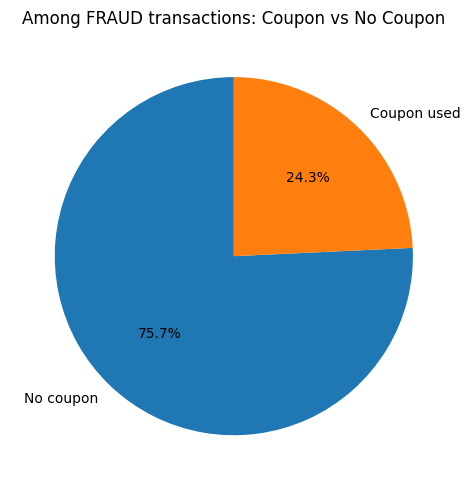

In [28]:
# Here our pie chart will check whether coupon usage correlates with fraud. If higher, tighten rules for coupon use.

if "coupon_applied" in df.columns and "is_fraud" in df.columns:
    # make coupon_applied readable labels
    coupon_map = {True: "Coupon used", False: "No coupon", 1: "Coupon used", 0: "No coupon"}
    fraud_only = df[df["is_fraud"] == True].copy()
    labels = fraud_only["coupon_applied"].map(coupon_map).fillna("Unknown")

    counts = labels.value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
    plt.title("Among FRAUD transactions: Coupon vs No Coupon")
    plt.tight_layout()
    plt.savefig(FIGDIR/"pie_coupon_among_fraud.png", dpi=150)
    plt.show()
else:
    print("Need columns 'coupon_applied' and 'is_fraud'.")


Above our pie chart represents the use of coupons used in fraudulent transactions. If there was a large proportion of coupons used then we would need to tighten the rules around coupon usage. For business requirements, we would need to investigate this further and even tighten the rules around coupon usage.

,metric,value
0,Total Transactions,10000.00
1,Fraud Count,643.00
2,Fraud Rate (%),6.43
3,Total Amount,797973.54


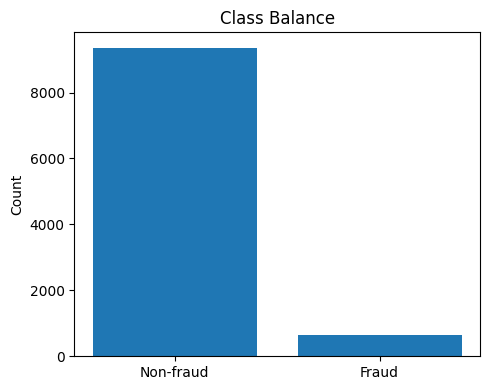

In [29]:
# Here we will create a key performance indicators (KPIs) and Class Balance Bar representing the rate of fraud in the dataset.

total_tx   = len(df)
fraud_tx   = int(df["is_fraud"].sum())          
fraud_rate = round(fraud_tx / total_tx * 100, 2)
total_amt  = round(df["amount"].sum(), 2)

kpi = pd.DataFrame({
    "metric": ["Total Transactions","Fraud Count","Fraud Rate (%)","Total Amount"],
    "value":  [total_tx, fraud_tx, fraud_rate, total_amt]
})
display(kpi)

# class balance bar
counts = df["is_fraud"].value_counts()
labels = ["Non-fraud","Fraud"]
plt.figure(figsize=(5,4))
plt.bar(labels, [counts.get(False,0), counts.get(True,0)])
plt.title("Class Balance")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIGDIR/"01_class_balance.png", dpi=150)
plt.show()


The above visualisations show the class balance between fraud and non-fraud transactions. The KPI table indicates that only 6.43% of all transactions are flagged as fraudulent.

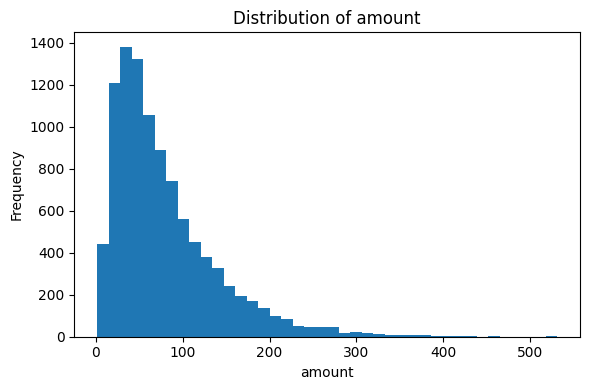

,Class,amount
0,Fraud,163.23
1,Non-fraud,74.06


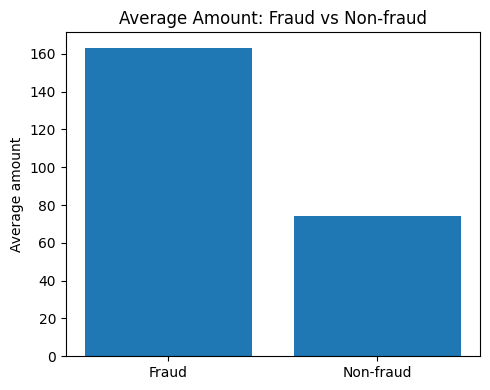

In [30]:
# Amount: distribution + average by class

# distribution of amount (all tx)
plt.figure(figsize=(6,4))
plt.hist(df["amount"].dropna().values, bins=40)
plt.title("Distribution of amount")
plt.xlabel("amount"); plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(FIGDIR/"02_hist_amount.png", dpi=150)
plt.show()

# average amount by class
avg_tbl = (df.assign(Class=np.where(df["is_fraud"], "Fraud","Non-fraud"))
             .groupby("Class")["amount"].mean().round(2).reset_index())
display(avg_tbl)

plt.figure(figsize=(5,4))
plt.bar(avg_tbl["Class"], avg_tbl["amount"])
plt.title("Average Amount: Fraud vs Non-fraud")
plt.ylabel("Average amount")
plt.tight_layout()
plt.savefig(FIGDIR/"03_avg_amount_by_class.png", dpi=150)
plt.show()


The above visualisations show the distribution of frequency and amount, the chart shows that more frequent transactions tend to be of lower amounts, while less frequent transactions are associated with higher amounts. This insight can help in identifying patterns of fraudulent activity, as fraudsters may attempt to conduct high-value transactions less frequently to avoid detection.

,count,fraud_count,fraud_rate_%
DayName,,,
Monday,1410,88,6.24
Tuesday,1403,90,6.41
Wednesday,1368,81,5.92
Thursday,1449,92,6.35
Friday,1498,95,6.34
Saturday,1410,94,6.67
Sunday,1462,103,7.05


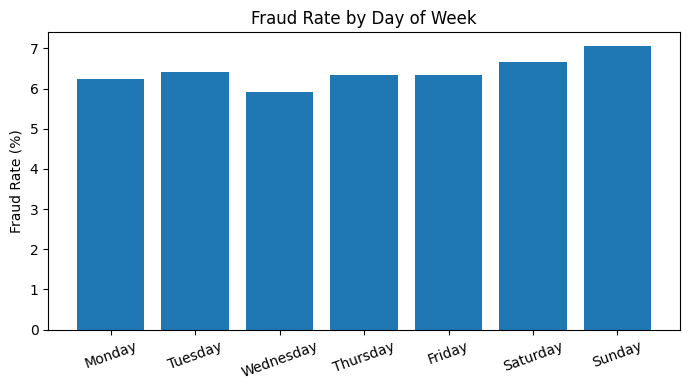

In [31]:
# Time patterns based on day of week, hour of day and fraud count

# dayofweek is 0=Mon ... 6=Sun in your file — map to names
dow_map = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df["DayName"] = df["dayofweek"].map(dow_map)

dow = (df.groupby("DayName")["is_fraud"]
         .agg(count="count", fraud_count=lambda s: int(s.sum())))
dow["fraud_rate_%"] = (dow["fraud_count"]/dow["count"]*100).round(2)
dow = dow.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
display(dow)

plt.figure(figsize=(7,4))
plt.bar(dow.index, dow["fraud_rate_%"].values)
plt.title("Fraud Rate by Day of Week")
plt.ylabel("Fraud Rate (%)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(FIGDIR/"04_fraud_rate_by_dayofweek.png", dpi=150)
plt.show()




From the visualisations above, we can see that the fraud rate is relatively consistent across different days of the week, with a slight increase on weekends. This insight can help in allocating resources for fraud detection more effectively during these periods espiecially on Sundays.


Fraud Rate by device (top 10):


,count,fraud_count,fraud_rate_%
device,,,
mobile,5961,411,6.89
desktop,3024,181,5.99
tablet,1015,51,5.02


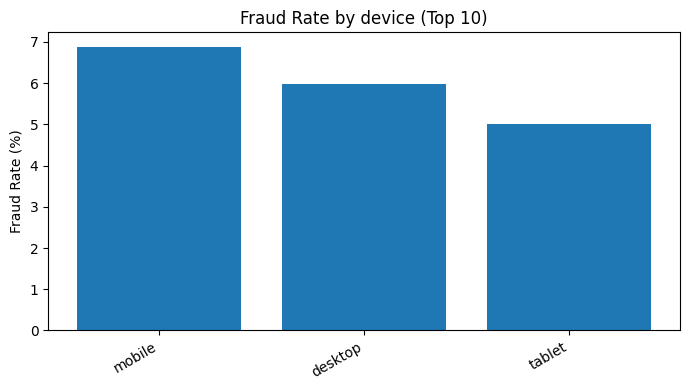


Fraud Rate by channel (top 10):


,count,fraud_count,fraud_rate_%
channel,,,
email,520,39,7.50
ads,1007,75,7.45
social,506,32,6.32
web,4519,285,6.31
app,3448,212,6.15


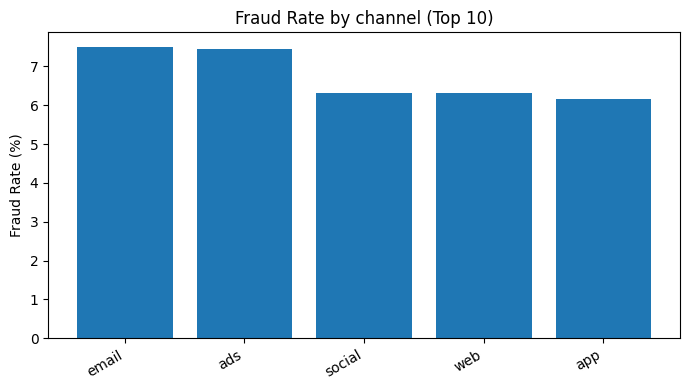


Fraud Rate by country (top 10):


,count,fraud_count,fraud_rate_%
country,,,
in,1501,139,9.26
br,644,48,7.45
jp,715,49,6.85
de,840,57,6.79
au,738,47,6.37
uk,976,62,6.35
us,1951,110,5.64
es,798,43,5.39
fr,983,51,5.19


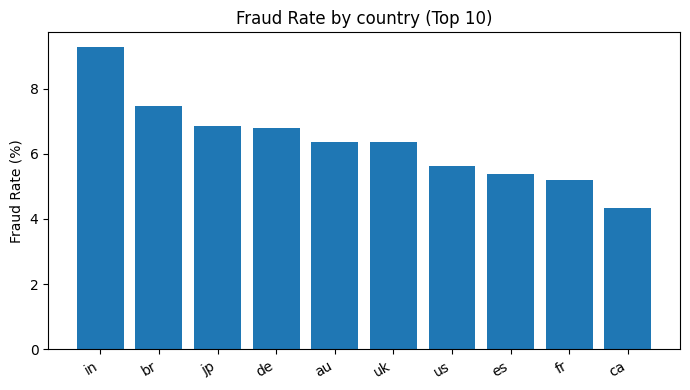

In [32]:
# Segments: device, channel, country (top 10 by fraud rate)


def fraud_rate_table(col):
    t = (df.groupby(col)["is_fraud"]
           .agg(count="count", fraud_count=lambda s: int(s.sum())))
    t["fraud_rate_%"] = (t["fraud_count"]/t["count"]*100).round(2)
    return t.sort_values("fraud_rate_%", ascending=False)

for col, slug in [("device","device"), ("channel","channel"), ("country","country")]:
    if col in df.columns:
        print(f"\nFraud Rate by {slug} (top 10):")
        tbl = fraud_rate_table(col)
        display(tbl.head(10))

        top10 = tbl.head(10)
        plt.figure(figsize=(7,4))
        plt.bar(top10.index.astype(str), top10["fraud_rate_%"].values)
        plt.title(f"Fraud Rate by {slug} (Top 10)")
        plt.ylabel("Fraud Rate (%)")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.savefig(FIGDIR/f"06_fraud_rate_by_{slug}_top10.png", dpi=150)
        plt.show()
    else:
        print(f"{col} not found — skipping.")


In the visualisations above we can observe that a much higher number of fraudulent transactions occur from mobile devices compared to desktop devices. This suggests that fraudsters may prefer using mobile platforms for their activities, possibly due to perceived anonymity or ease of access. Understanding this trend can help in tailoring fraud detection strategies to focus more on mobile transactions.

While email channels have a higher percentage  of fraudulent transactions, the overall volume of transactions is significantly lower compared to web and mobile channels. This indicates that while email may be a riskier channel on a percentage basis, the majority of fraud still occurs through web, apps and ads platforms due to their higher transaction volumes. This insight can help in prioritizing fraud detection efforts across different channels.

C:\Users\Nine\AppData\Local\Temp\ipykernel_38416\3342684503.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dec = (d2.groupby("amount_decile")["is_fraud"]


,count,fraud_count,fraud_rate_%
amount_decile,,,
D1,1000,11,1.1
D2,1000,26,2.6
D3,1000,24,2.4
D4,1000,26,2.6
D5,1000,25,2.5
D6,1000,37,3.7
D7,1000,44,4.4
D8,1000,52,5.2
D9,1000,117,11.7


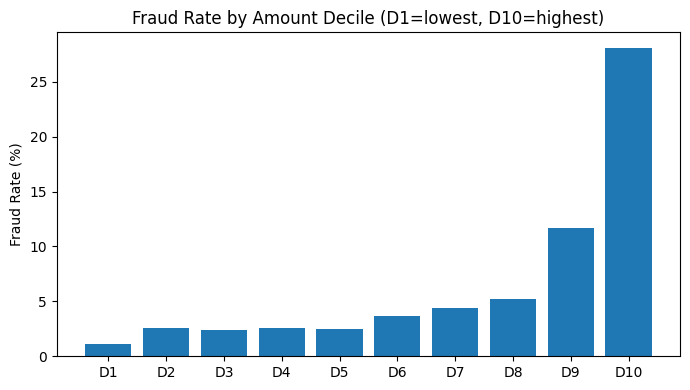

In [33]:
# Amount deciles vs fraud rate, which shows if higher amounts are more likely to be fraudulent


d2 = df.loc[df["amount"].notna(), ["amount","is_fraud"]].copy()
d2["amount_decile"] = pd.qcut(d2["amount"], 10, labels=[f"D{i}" for i in range(1,11)])

dec = (d2.groupby("amount_decile")["is_fraud"]
         .agg(count="count", fraud_count=lambda s: int(s.sum())))
dec["fraud_rate_%"] = (dec["fraud_count"]/dec["count"]*100).round(2)
dec = dec.sort_index()
display(dec)

plt.figure(figsize=(7,4))
plt.bar(dec.index.astype(str), dec["fraud_rate_%"].values)
plt.title("Fraud Rate by Amount Decile (D1=lowest, D10=highest)")
plt.ylabel("Fraud Rate (%)")
plt.tight_layout()
plt.savefig(FIGDIR/"07_fraud_rate_by_amount_decile.png", dpi=150)
plt.show()


From the visualisation above, we can see that fraudulent transactions have a higher average spend amount. We can compare this by seeing the steady increase from D1 to D8, then a high spike at D9 and D10.

channel,ads,app,email,social,web
device,,,,,
desktop,5.48,5.54,7.09,6.71,6.24
mobile,7.83,6.92,6.69,6.38,6.74
tablet,10.78,3.27,14.00,5.08,4.06


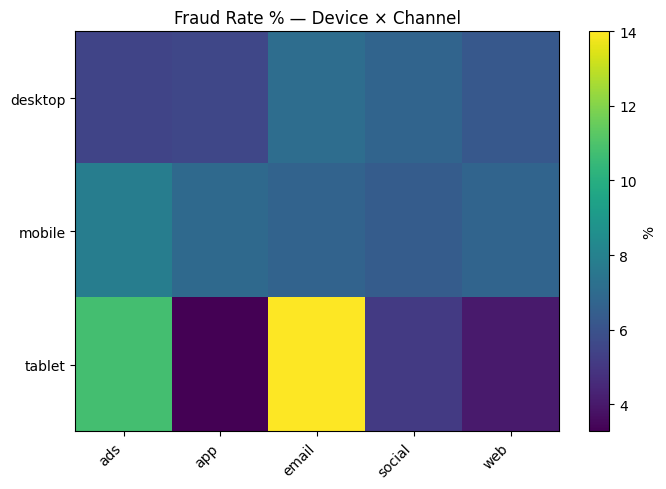

In [34]:
# device and channel combination matrix (top 10 by fraud rate)

if "device" in df.columns and "channel" in df.columns:
    t = (df.groupby(["device","channel"])["is_fraud"]
           .agg(count="count", fraud_count=lambda s: int(s.sum())))
    t["fraud_rate_%"] = (t["fraud_count"]/t["count"]*100).round(2)

    pivot = t["fraud_rate_%"].unstack("channel").fillna(0).round(2)
    display(pivot)  # nice table for README

    plt.figure(figsize=(7,5))
    plt.imshow(pivot.values, aspect="auto", interpolation="nearest")
    plt.title("Fraud Rate % — Device × Channel")
    plt.colorbar(label="%")
    plt.xticks(range(pivot.shape[1]), pivot.columns, rotation=45, ha="right")
    plt.yticks(range(pivot.shape[0]), pivot.index)
    plt.tight_layout()
    plt.savefig(FIGDIR/"08_heatmap_device_by_channel.png", dpi=150)
    plt.show()
else:
    print("Need both 'device' and 'channel' columns for the matrix.")


In the matrix visualisation above we can easily identify the the risks of fraudulent transactions cross the different devices and channels. This insights can be used to prioritise fraud detection efforts on a simple visual matrix.

---

Notes and Conclusions

* Fraud is a minority class (6.43% of transactions).
* Fraud occurs slightly more on weekends, especially Sundays.
* Fraudulent transactions tend to be of higher amounts.
* Targeted controls: apply stricter controls on higher-risk segments (e.g., specific device–channel combos or countries) while avoiding blanket blocks.
* Promo flows: if fraud share within coupon-applied orders is elevated, add promo-flow safeguards (velocity limits, stricter address/identity checks).


Limitations
* The analysis is based on historical data and may not capture emerging fraud patterns.
* The sample size for certain segments may be small, leading to less reliable insights.

---